<a href="https://colab.research.google.com/github/pseeej/MachineLearning_DCLAB/blob/master/My%20First%20ML%2CDL/4.6.4%20Voting%20Ensemble%20MNIST%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [8]:
# 단일 모델의 정확도 측정

# 불순도 계산 방법을 gini로. tree 최대 깊이 8, 최상의 분할 찾을 때 고려할 기능 수 32, estimator의 randomness 지정
dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=8, max_features=32, random_state=35)  
dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
print("[accuracy]")
print("d-tree : ", accuracy_score(y_test, dtree_predicted))
print("knn    : ", accuracy_score(y_test, knn_predicted))
print("svm    : ", accuracy_score(y_test, svm_predicted))

[accuracy]
d-tree :  0.8333333333333334
knn    :  0.8638888888888889
svm    :  0.925


In [9]:
# 분류값별 확률 확인
# 직접 소프트 보팅 구현 위해 predict_proba 함수 사용.

svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[1.11995827e-02 5.43532229e-02 6.40846247e-02 3.11595557e-01
  2.15427078e-02 5.30584425e-02 1.18875270e-02 7.34116502e-02
  3.35231733e-01 6.36349522e-02]
 [7.09622408e-04 1.27090611e-03 2.19874001e-03 1.58675564e-03
  7.25202436e-04 9.73898267e-01 5.69631393e-04 1.48708658e-03
  1.50582966e-02 2.49549171e-03]]


In [12]:
# 하드 보팅

voting_clf = VotingClassifier(estimators=[('decision_tree', dtree), ('knn', knn), ('svm', svm)],
                              weights=[1, 1, 1], voting='hard').fit(X_train, y_train)
                
hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted) # 정확도

0.9194444444444444

In [14]:
# 소프트 보팅

voting_clf = VotingClassifier(estimators=[('decision_tree', dtree), ('knn', knn), ('svm', svm)],
                              weights=[1, 1, 1], voting='soft').fit(X_train, y_train)

soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.8944444444444445

([<matplotlib.axis.XTick at 0x7fe7b0076d90>,
 [Text(0, 0, 'decision tree'),
  Text(0, 0, 'kvm'),
  Text(0, 0, 'svm'),
  Text(0, 0, 'hard voting'),
  Text(0, 0, 'soft voting')])

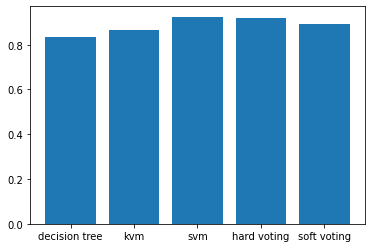

In [15]:
# 단일 모델과 앙상블 모델의 정확도 비교 시각화

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height=[accuracy_score(y_test, dtree_predicted),
                   accuracy_score(y_test, knn_predicted),
                   accuracy_score(y_test, svm_predicted),
                   accuracy_score(y_test, hard_voting_predicted),
                   accuracy_score(y_test, soft_voting_predicted)])

plt.xticks(x, ['decision tree', 'kvm', 'svm', 'hard voting', 'soft voting'])